In [1]:
import numpy as np
import scipy as sp
from scipy.stats import chi2

import matplotlib.pyplot as plt

In [2]:
def getL2Sol(data, G):
    
    """
    Function to calculate least square/L2 solution
    
    Parameters
    -----------
    data: data (numpy array) # dependent variable only
    G: model matrix (numpy array)
    
    Returns
    --------
    ls_sol: least square solution
    residual: res
    G: model matrix
    
    """

    #-- ML2 Solution ---
    Coeff = np.matmul(np.linalg.inv(np.matmul(np.transpose(G), G)), np.transpose(G))
    ls_sol = np.matmul(Coeff, data)
    
    return ls_sol
    
def getL1Sol(data, G, L2_solution, tol):
    
    """
    Function to calculate IRLS/L1 solution
    
    Parameters
    -----------
    data: data (numpy array)
    G: model matrix (numpy array)
    ls_solution: least square solution for the initialization of iterative procedure
    tol: error tolerance
    
    Returns
    --------
    
    mL1_new: L1 solution (numpy array)
    
    """
        
    nObs, nParams = G.shape
    
    error = 1
    m_init = L2_solution

    while(error > tol):

        # cacluate the R matrix
        r_init = data - np.matmul(G, m_init.reshape(nParams,1)).flatten()
        R_init = np.zeros((nObs, nObs))

        for i in range(nObs):

            R_init[i,i] = 1/abs(r_init[i])

        # calculate the coefficient matrix
        Coeff = np.matmul(np.linalg.inv(np.matmul(np.matmul(np.transpose(G), R_init), G)), \
                          np.matmul(np.transpose(G), R_init))

        # new ML1 solution
        mL1_new = np.matmul(Coeff, data)

        # error calculation
        error = np.linalg.norm(mL1_new - m_init) / (1 + np.linalg.norm(mL1_new))

        m_init = mL1_new
        
    return mL1_new

In [3]:
mean, sigma = 0, 8  # normal data errors

#-- data (first and second column represent time and position respectively ---
data = np.array([[1, 109.4], [2, 187.5], [3, 267.5], [4, 131.9], [5, 386.1], [6, 428.4], \
             [7, 452.2], [8, 498.1], [9, 512.3], [10, 513.0]]) 

nParams = 3
nObs = data.shape[0]

#-- model matrix ---
G = np.ones((nObs, 3))
G[:,1] = G[:,1] * data[:,0]
G[:,2] = - G[:,2] * data[:,0]**2 / 2

tol = 10**(-6) # error tolerance for IRLS/L1 algorithm
L2_solution = getL2Sol(data[:,1], G)
L1_solution = getL1Sol(data[:,1], G, L2_solution, tol)

#-- model prediction with L1 solution ---
model_L1 = L1_solution[0] + L1_solution[1]*data[:,0] \
                                - 0.5 * L1_solution[2] * data[:,0]**2

#-- model prediction with L2 solution ---
model_L2 = L2_solution[0] + L2_solution[1]*data[:,0] \
                                - 0.5 * L2_solution[2] * data[:,0]**2

print('L2 solution')
print('m_1: {}'.format(L2_solution[0]))
print('m_2: {}'.format(L2_solution[1]))
print('m_3: {}\n'.format(L2_solution[2]))

print('L1 solution')
print('m_1: {}'.format(L1_solution[0]))
print('m_2: {}'.format(L1_solution[1]))
print('m_3: {}\n'.format(L1_solution[2]))


L2 solution
m_1: 26.408333333339442
m_2: 75.60765151515051
m_3: 4.8628787878786355

L1 solution
m_1: 17.16713855846153
m_2: 96.97167167790973
m_3: 9.477620478473497



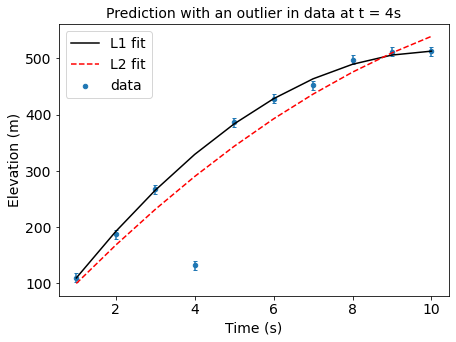

In [4]:
#-- plotting the data with model prediction ---
plt.figure(figsize=(7,5))

plt.scatter(data[:,0], data[:,1], label='data', s=20)
plt.errorbar(data[:,0], data[:,1], yerr = sigma, capsize=2, ls='None')
plt.plot(data[:,0], model_L1, c='k', label='L1 fit')
plt.plot(data[:,0], model_L2, ls='--', c='r', label='L2 fit')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Elevation (m)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, fontsize=14)
plt.title('Prediction with an outlier in data at t = 4s', fontsize=14)
plt.show()

#### Conclusion
We can clearly see that IRLS/L1 fit is robust against the outlier in the data as compared to L2 fit.